In [1]:
import gdax
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import OrderedDict

from datetime import datetime, timedelta
from math import ceil
from time import sleep

from backtest import historic_prices

%matplotlib inline
client = gdax.PublicClient()

From: 2018-05-16T14:31:41, To: 2018-05-18T16:31:41
From: 2018-05-14T12:31:41, To: 2018-05-16T14:31:41
From: 2018-05-12T10:31:41, To: 2018-05-14T12:31:41
From: 2018-05-10T08:31:41, To: 2018-05-12T10:31:41
From: 2018-05-08T06:31:41, To: 2018-05-10T08:31:41
From: 2018-05-06T04:31:41, To: 2018-05-08T06:31:41
From: 2018-05-04T02:31:41, To: 2018-05-06T04:31:41
From: 2018-05-02T00:31:41, To: 2018-05-04T02:31:41
From: 2018-04-29T22:31:41, To: 2018-05-02T00:31:41
From: 2018-04-27T20:31:41, To: 2018-04-29T22:31:41
From: 2018-04-25T18:31:41, To: 2018-04-27T20:31:41
From: 2018-04-23T16:31:41, To: 2018-04-25T18:31:41
From: 2018-04-21T14:31:41, To: 2018-04-23T16:31:41
From: 2018-04-19T12:31:41, To: 2018-04-21T14:31:41
From: 2018-04-17T10:31:41, To: 2018-04-19T12:31:41
From: 2018-04-15T08:31:41, To: 2018-04-17T10:31:41
From: 2018-04-13T06:31:41, To: 2018-04-15T08:31:41
From: 2018-04-11T04:31:41, To: 2018-04-13T06:31:41
From: 2018-04-09T02:31:41, To: 2018-04-11T04:31:41
From: 2018-04-07T00:31:41, To: 

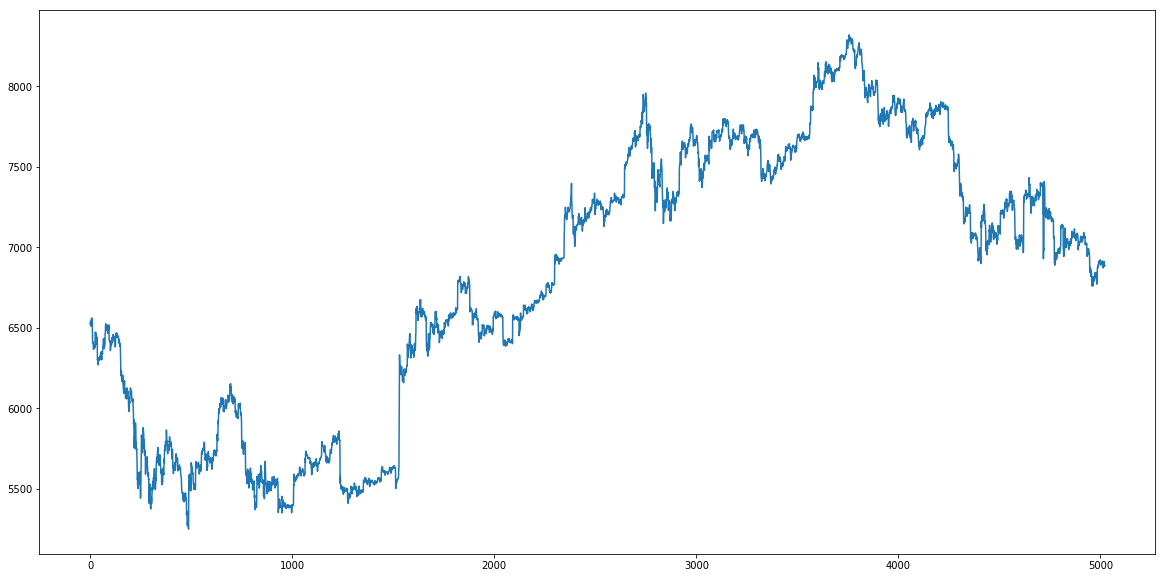

In [2]:
prices = historic_prices(client=client, product='BTC-EUR', num_candles=5000, granularity=60 * 15)
ticks = len(prices)
print('{} prices'.format(ticks))

pd.Series(prices).plot(figsize=(20,10))


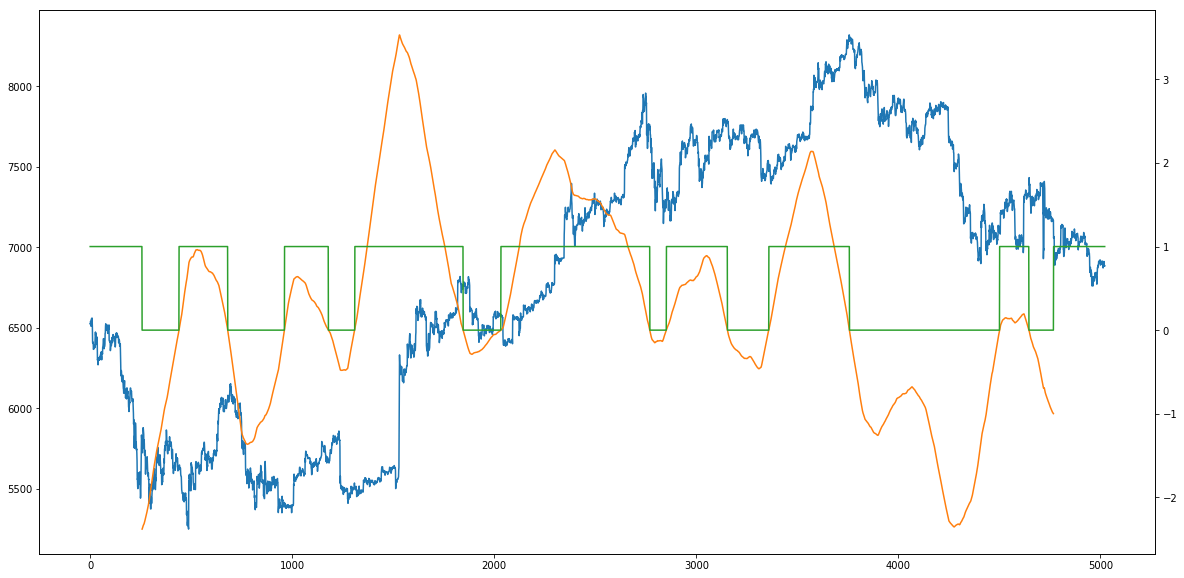

In [8]:
window = 256
pd_prices = pd.Series(prices)
avg_prices = pd_prices.rolling(window=window,center=True).mean()
avg_price_del = avg_prices.diff().rolling(window=window,center=True).mean()
stances = avg_price_del.where(avg_price_del > 0.0, 0).where(avg_price_del <= 0.0, 1)
pd_prices.plot(figsize=(20,10))
avg_price_del.plot(secondary_y=True)
stances.plot(secondary_y=True)
labels = avg_price_del.values
#avg_prices.plot(secondary_y=True, grid=True)


In [9]:
print(np.array(prices).shape)
print(labels.shape)
np.savetxt('prices.csv', np.array(prices), delimiter=",")
np.savetxt('labels.csv', np.array(labels), delimiter=",")

a = np.genfromtxt('prices.csv', delimiter=",")
b = np.genfromtxt('labels.csv', delimiter=",")
print(a[:10], b[:10])

(5022,)
(5022,)
[6525.   6523.53 6541.3  6530.   6511.06 6520.   6556.01 6554.66 6533.41
 6562.02] [nan nan nan nan nan nan nan nan nan nan]
